In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
df = pd.read_pickle('microstucture.pkl')
df.head()

,index,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness_init,stiffness_end,stiffness_ratio,mortar_damage
0,0,"[1, 3, 54]","[44.980112526027035, 47.16146038289884, 249.58...","{16: [[11.634028130284323, 5.182346340744194]]...","{16: [2.2449345075253415], 8: [1.6455719360013...","{16: [0.6858273932924801], 8: [0.7353582880135...",0.204720,-0.000794,27534.98,13605.44,0.494115,0.307259
1,1,"[4, 8, 0]","[278.0840614361895, 144.40479803053336, 0.0]","{16: [[10.922469597792166, 7.119867552525796],...","{16: [1.534083256073687, 1.3558929490918499, 1...","{16: [0.6918901640856667, 0.6835016016191318, ...",0.221336,-0.000548,30629.28,13322.23,0.434951,0.376798
2,2,"[2, 13, 0]","[125.1913778438531, 215.9813556447589, 0.0]","{16: [[11.30634428058544, 8.841091265113812], ...","{16: [1.2788403537015056, 1.1453809717470627],...","{16: [0.8122733416691932, 0.7154878314704103],...",0.197751,-0.000681,28962.97,13278.01,0.458448,0.296556
3,3,"[3, 9, 29]","[147.8599102513112, 162.24778265410401, 130.09...","{16: [[8.744291518313723, 3.9869423477763792],...","{16: [2.1932324963742302, 1.872639248932646, 1...","{16: [0.6374008046284033, 0.595356037624701, 0...",0.244860,-0.000608,29644.40,12190.48,0.411224,0.429490
4,4,"[4, 4, 34]","[214.29927185031744, 67.99614832644124, 148.78...","{16: [[8.53137439993541, 7.901661968749836], [...","{16: [1.0796936687086862, 1.7187243032645076, ...","{16: [0.7162784809176268, 0.6393809837372455, ...",0.232117,-0.000644,29301.05,12944.98,0.441792,0.400875


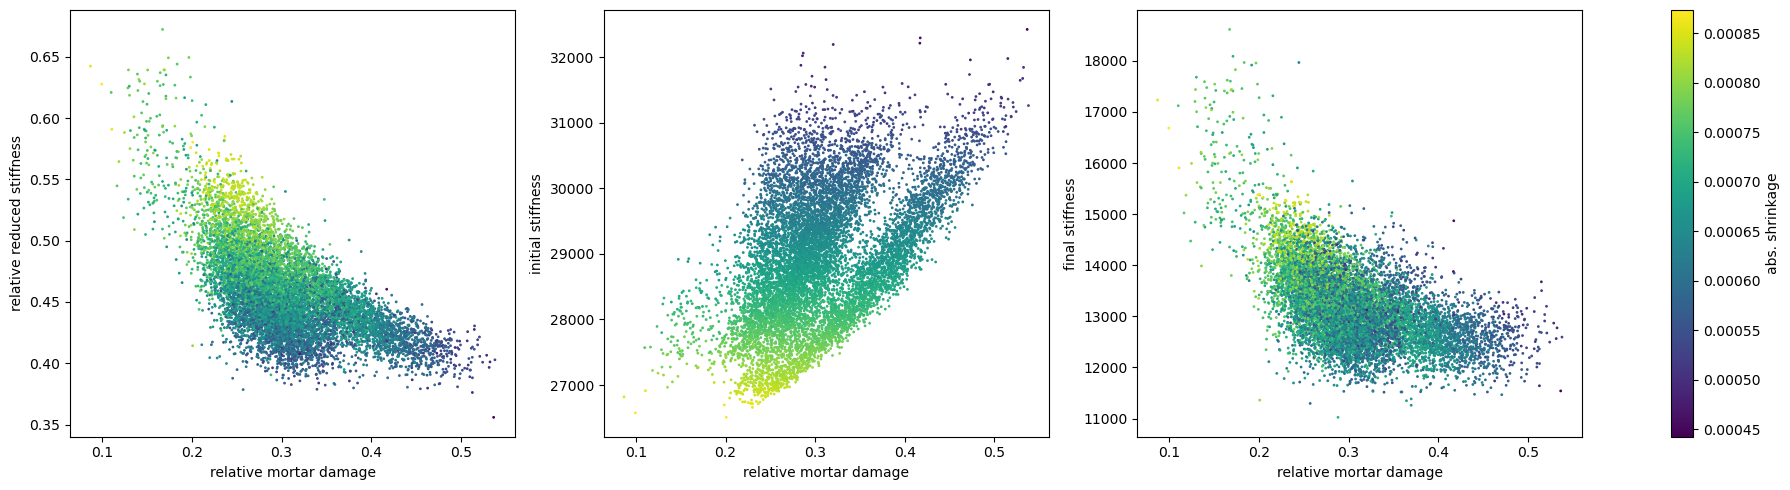

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=4, width_ratios=(1,1,1,0.05), figsize=(18,5))

sc1 = axs[0].scatter(df['mortar_damage'], df['stiffness_ratio'], s=1, c=-df['shrinkage'])
axs[0].set_xlabel('relative mortar damage')
axs[0].set_ylabel('relative reduced stiffness')

axs[1].scatter(df['mortar_damage'], df['stiffness_init'], s=1, c=-df['shrinkage'])
axs[1].set_xlabel('relative mortar damage')
axs[1].set_ylabel('initial stiffness')

axs[2].scatter(df['mortar_damage'], df['stiffness_end'], s=1, c=-df['shrinkage'])
axs[2].set_xlabel('relative mortar damage')
axs[2].set_ylabel('final stiffness')

plt.colorbar(mappable=sc1, cax=axs[3], label='abs. shrinkage')

plt.tight_layout()

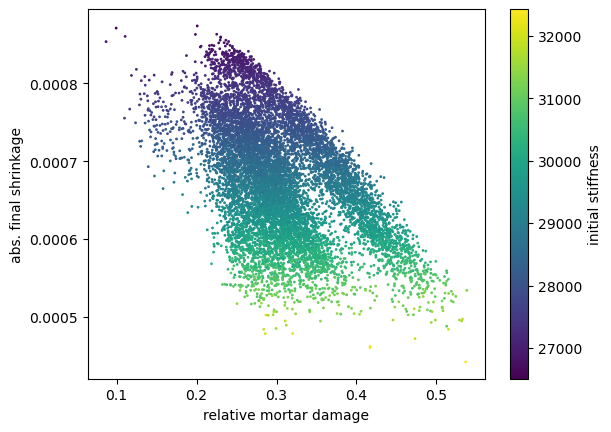

In [55]:
plt.scatter(df['mortar_damage'], -df['shrinkage'], s=1, c=df['stiffness_init'])
plt.xlabel('relative mortar damage')
plt.ylabel('abs. final shrinkage')
plt.colorbar(label = 'initial stiffness')

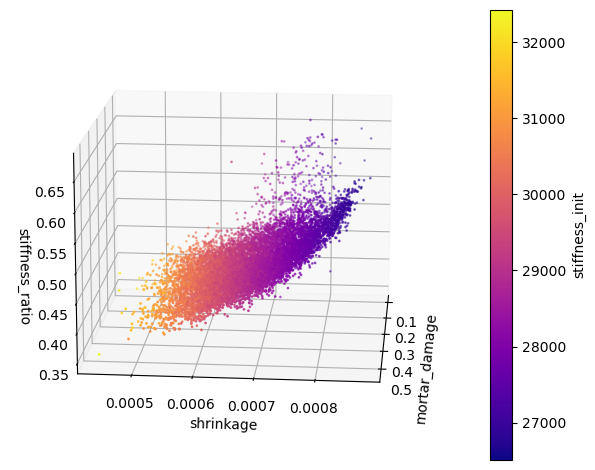

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(df['mortar_damage'], -df['shrinkage'], df['stiffness_ratio'], c=df['stiffness_init'], s=1)
ax.view_init(elev=15, azim=5)
fig.colorbar(scat, label='stiffness_init')
ax.set_xlabel('mortar_damage')
ax.set_ylabel('shrinkage')
ax.set_zlabel('stiffness_ratio')

plt.tight_layout()
plt.show()

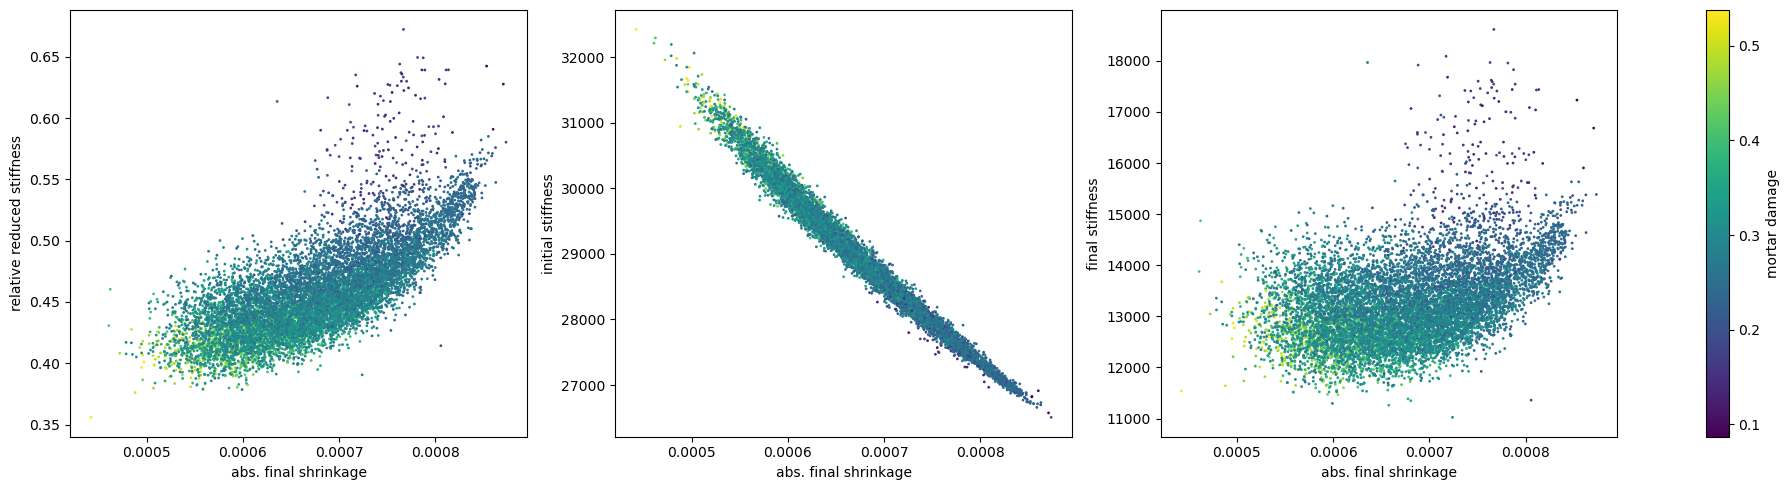

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=4, width_ratios=(1,1,1,0.05), figsize=(18,5))

sc1 = axs[0].scatter(-df['shrinkage'], df['stiffness_ratio'], s=1, c=df['mortar_damage'])
axs[0].set_xlabel('abs. final shrinkage')
axs[0].set_ylabel('relative reduced stiffness')

axs[1].scatter(-df['shrinkage'], df['stiffness_init'], s=1, c=df['mortar_damage'])
axs[1].set_xlabel('abs. final shrinkage')
axs[1].set_ylabel('initial stiffness')

axs[2].scatter(-df['shrinkage'], df['stiffness_end'], s=1, c=df['mortar_damage'])
axs[2].set_xlabel('abs. final shrinkage')
axs[2].set_ylabel('final stiffness')

plt.colorbar(mappable=sc1, cax=axs[3], label='mortar damage')

plt.tight_layout()

In [68]:
X = np.array([area for area in df['curve_area']])
X = np.hstack([X, np.reshape(df['stiffness_init'].to_numpy(), (-1, 1))])

<Figure size 640x480 with 0 Axes>

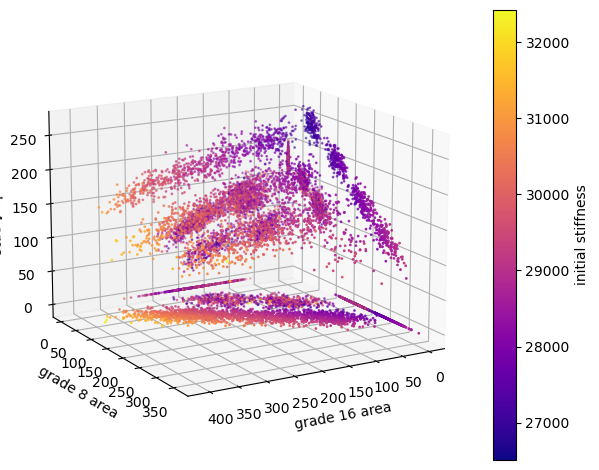

In [73]:
plt.set_cmap('plasma')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,3], s=1)
ax.view_init(elev=15, azim=60)
fig.colorbar(scat, label='initial stiffness')
ax.set_xlabel('grade 16 area')
ax.set_ylabel('grade 8 area')
ax.set_zlabel('grade 4 area')

plt.tight_layout()
plt.show()

In [86]:
X_norm = X

In [89]:
X_norm[:,0] = X[:,0] / X[:,0].max()
X_norm[:,1] = X[:,1] / X[:,1].max()
X_norm[:,2] = X[:,2] / X[:,2].max()
X_norm[:,3] = (X[:,3] - X[:,3].min()) / (X[:,3].max() - X[:,3].min())

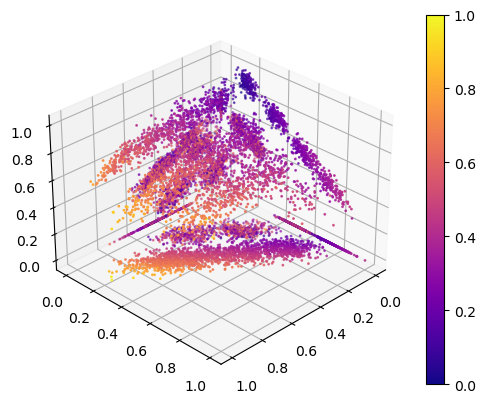

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X_norm[:,0], X_norm[:,1], X_norm[:,2], c=X_norm[:,3], s=1)
fig.colorbar(scat)
ax.view_init(elev=30, azim=45)
plt.show()

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [145]:
Sum_of_squared_distances = []
silhouette_avg = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    km = km.fit(X_norm)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_avg.append(silhouette_score(X_norm, km.labels_))

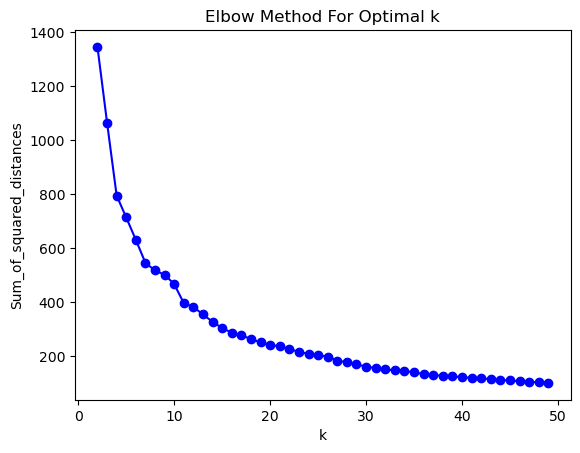

In [146]:
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

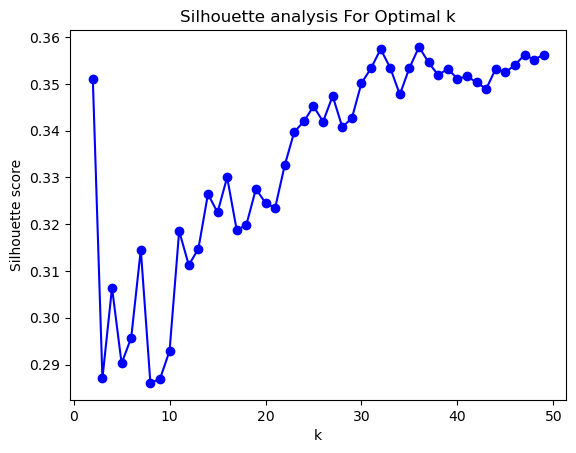

In [147]:
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('k') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [150]:
kmeans = KMeans(n_clusters=36, random_state=0, n_init="auto").fit(X_norm)
knn_classes = kmeans.labels_

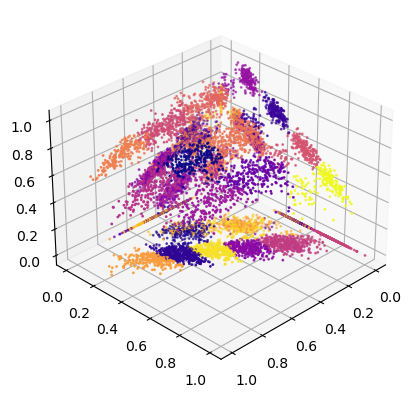

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X_norm[:,0], X_norm[:,1], X_norm[:,2], c=knn_classes, s=1)
ax.view_init(elev=30, azim=45)
plt.show()

In [155]:
df['class'] = knn_classes

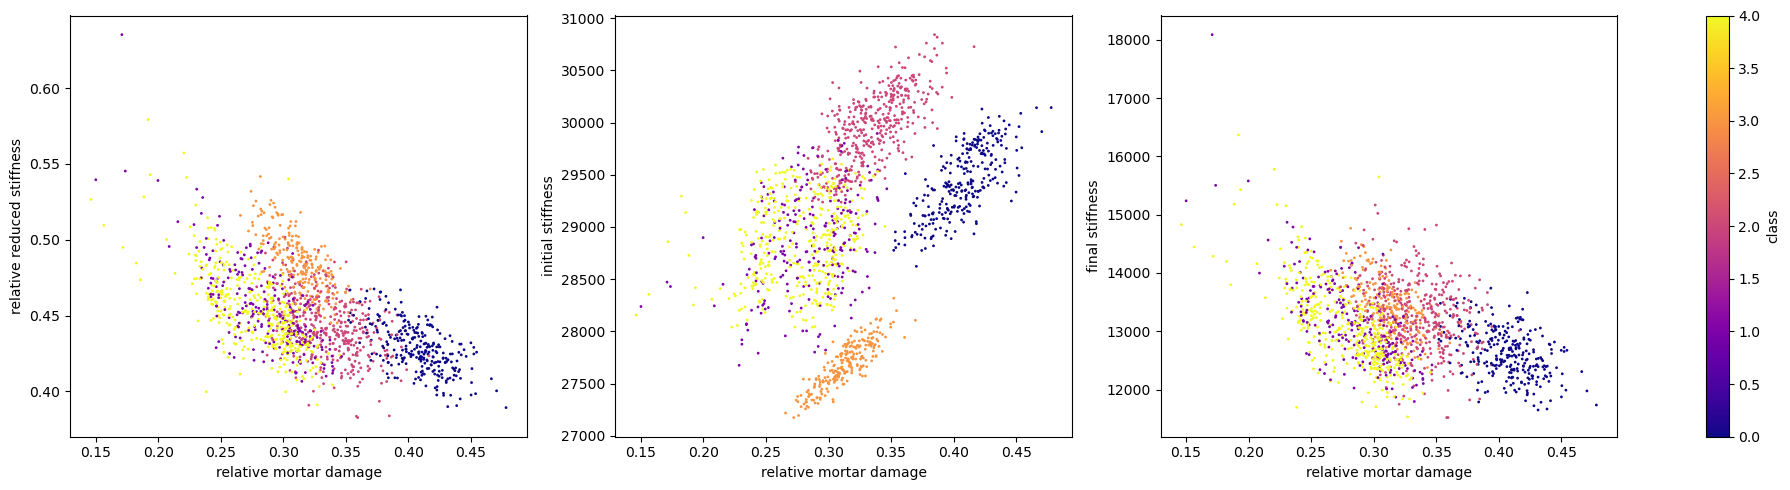

In [173]:
fig, axs = plt.subplots(nrows=1, ncols=4, width_ratios=(1,1,1,0.05), figsize=(18,5))

df_c = df[df['class']<=4]

sc1 = axs[0].scatter(df_c['mortar_damage'], df_c['stiffness_ratio'], s=1, c=df_c['class'])
axs[0].set_xlabel('relative mortar damage')
axs[0].set_ylabel('relative reduced stiffness')

axs[1].scatter(df_c['mortar_damage'], df_c['stiffness_init'], s=1, c=df_c['class'])
axs[1].set_xlabel('relative mortar damage')
axs[1].set_ylabel('initial stiffness')

axs[2].scatter(df_c['mortar_damage'], df_c['stiffness_end'], s=1, c=df_c['class'])
axs[2].set_xlabel('relative mortar damage')
axs[2].set_ylabel('final stiffness')

plt.colorbar(mappable=sc1, cax=axs[3], label='class')

plt.tight_layout()

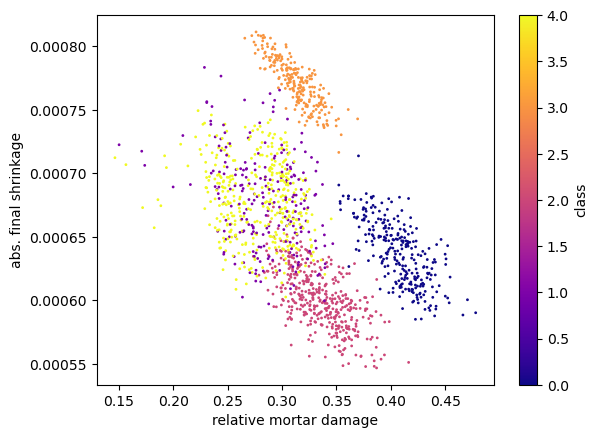

In [174]:
plt.scatter(df_c['mortar_damage'], -df_c['shrinkage'], s=1, c=df_c['class'])
plt.xlabel('relative mortar damage')
plt.ylabel('abs. final shrinkage')
plt.colorbar(label = 'class')

In [199]:
X = np.array([area for area in df['curve_area']])

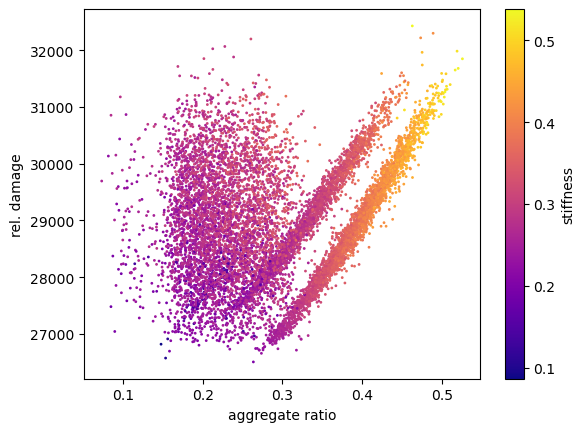

In [204]:
plt.scatter(X[:,:3].sum(axis=1) / (32*32), df['stiffness_init'], c=df['mortar_damage'], s=1)
plt.xlabel('aggregate ratio')
plt.ylabel('rel. damage')
plt.colorbar(label = 'stiffness')

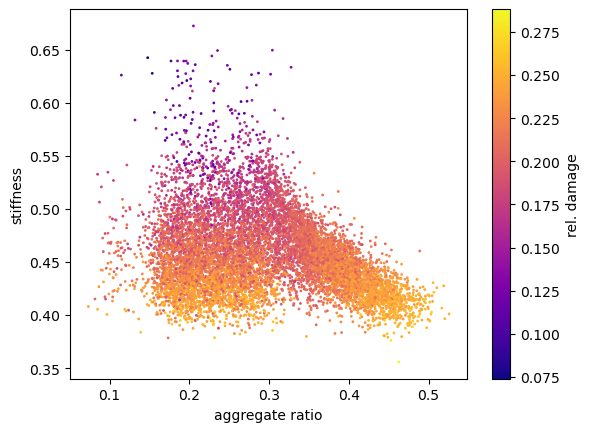

In [52]:
plt.scatter(X.sum(axis=1)/(32 * 32), stiffness_red, c=df['damage'], s=1)
plt.xlabel('aggregate ratio')
plt.ylabel('stiffness')
plt.colorbar(label = 'rel. damage')

In [69]:
roundness_16 = np.array([np.mean(roundn[16]) for roundn in df['roundness']])
roundness_8 = np.array([np.mean(roundn[8]) for roundn in df['roundness']])
roundness_4 = np.array([np.mean(roundn[4]) for roundn in df['roundness']])

c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


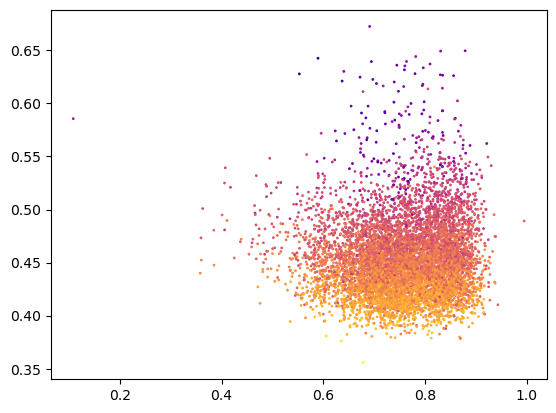

In [68]:
plt.scatter(roundness_16, stiffness_red, c=df['damage'], s=1)

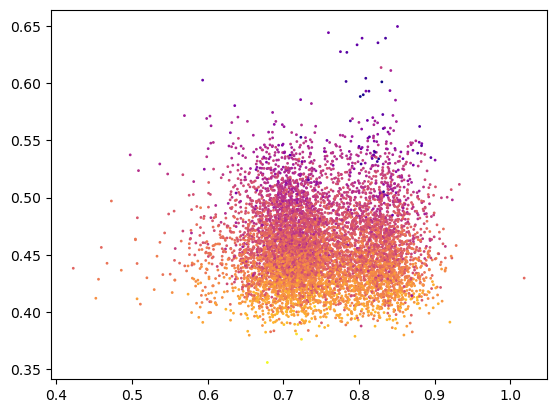

In [70]:
plt.scatter(roundness_8, stiffness_red, c=df['damage'], s=1)

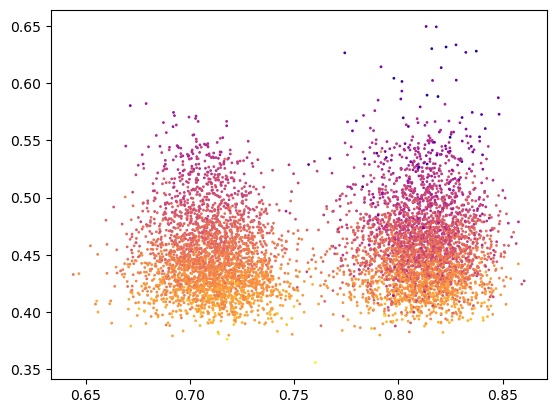

In [71]:
plt.scatter(roundness_4, stiffness_red, c=df['damage'], s=1)

In [72]:
ratios_16 = np.array([np.mean(roundn[16]) for roundn in df['ratios']])
ratios_8 = np.array([np.mean(roundn[8]) for roundn in df['ratios']])
ratios_4 = np.array([np.mean(roundn[4]) for roundn in df['ratios']])

c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


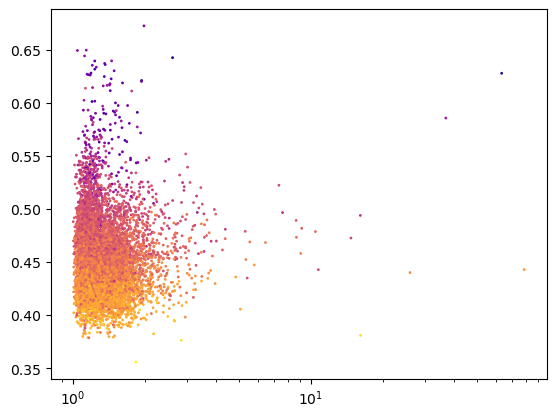

In [79]:
plt.scatter(ratios_16, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')

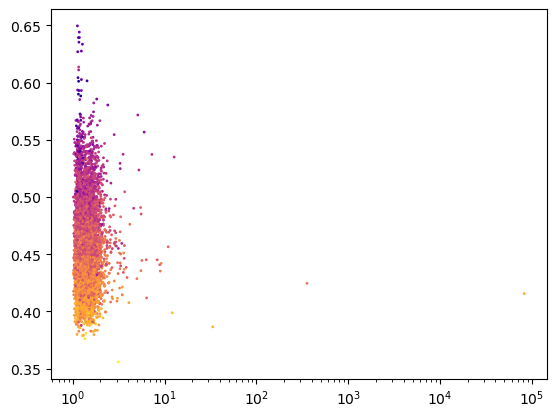

In [76]:
plt.scatter(ratios_8, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')

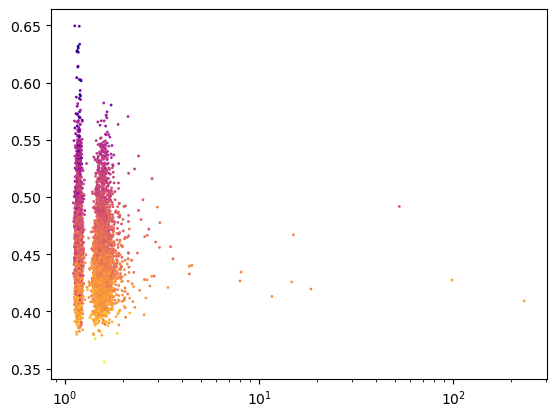

In [77]:
plt.scatter(ratios_4, stiffness_red, c=df['damage'], s=1)
plt.xscale('log')